In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv('train_AUpWtIz/test_QyjYwdj.csv')
campaign_data = pd.read_csv('train_AUpWtIz/campaign_data.csv')
coupon_item_mapping = pd.read_csv('train_AUpWtIz/coupon_item_mapping.csv')
customer_demographics = pd.read_csv('train_AUpWtIz/customer_demographics.csv')
customer_transaction_data = pd.read_csv('train_AUpWtIz/customer_transaction_data.csv',mangle_dupe_cols=True,nrows=463598)
item_data = pd.read_csv('train_AUpWtIz/item_data.csv')

In [6]:
print(len(train))
train.info()

50226
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50226 entries, 0 to 50225
Data columns (total 4 columns):
id             50226 non-null int64
campaign_id    50226 non-null int64
coupon_id      50226 non-null int64
customer_id    50226 non-null int64
dtypes: int64(4)
memory usage: 1.5 MB


In [7]:
train_campaign = pd.merge(train,campaign_data,how='left',on='campaign_id')

In [8]:
print(len(train))
train.info()

50226
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50226 entries, 0 to 50225
Data columns (total 4 columns):
id             50226 non-null int64
campaign_id    50226 non-null int64
coupon_id      50226 non-null int64
customer_id    50226 non-null int64
dtypes: int64(4)
memory usage: 1.5 MB


In [9]:
train_campaign.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date
0,3,22,869,967,X,16/09/13,18/10/13
1,4,20,389,1566,Y,07/09/13,16/11/13
2,5,22,981,510,X,16/09/13,18/10/13
3,8,25,1069,361,Y,21/10/13,22/11/13
4,10,17,498,811,Y,29/07/13,30/08/13


In [10]:
train_coustomer_demographics = pd.merge(train_campaign,customer_demographics,how='left',on='customer_id')

In [11]:
len(train_coustomer_demographics)

50226

In [12]:
train_coustomer_demographics.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,3,22,869,967,X,16/09/13,18/10/13,36-45,NaN,0.0,1,NaN,5.0
1,4,20,389,1566,Y,07/09/13,16/11/13,26-35,NaN,0.0,2,NaN,9.0
2,5,22,981,510,X,16/09/13,18/10/13,26-35,NaN,0.0,2,1,1.0
3,8,25,1069,361,Y,21/10/13,22/11/13,18-25,NaN,0.0,1,NaN,3.0
4,10,17,498,811,Y,29/07/13,30/08/13,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
coupon_item = pd.merge(coupon_item_mapping,item_data,how='left',on='item_id')

In [14]:
coupon_item.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,107,75,56,Local,Grocery
2,494,76,209,Established,Grocery
3,522,77,278,Established,Grocery
4,518,77,278,Established,Grocery


In [15]:
coupon_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92663 entries, 0 to 92662
Data columns (total 5 columns):
coupon_id     92663 non-null int64
item_id       92663 non-null int64
brand         92663 non-null int64
brand_type    92663 non-null object
category      92663 non-null object
dtypes: int64(3), object(2)
memory usage: 4.2+ MB


In [16]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


# EDA on customer Transaction Data

In [17]:
len(customer_transaction_data)

463598

In [18]:
customer_transaction_data_agg = customer_transaction_data.groupby(['date','customer_id']).agg('sum').reset_index()

In [19]:
len(customer_transaction_data_agg)

50766

In [20]:
customer_transaction_data_agg.head(200)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,67,83833,7,192.34,-14.96,0.00
1,2012-01-02,135,501452,25,2248.67,-425.65,0.00
2,2012-01-02,464,1845933,90,5189.79,-1733.21,-330.91
3,2012-01-02,679,1089746,50,4466.01,-612.66,0.00
4,2012-01-02,751,338705,12,1142.33,-310.60,0.00
...,...,...,...,...,...,...,...
195,2012-01-11,1568,240259,6,303.50,-136.06,0.00
196,2012-01-12,9,902848,41,3082.89,-487.98,0.00
197,2012-01-12,17,117679,5,420.67,-52.35,0.00
198,2012-01-12,86,219250,10,753.36,-336.60,0.00


In [21]:
cols1 = customer_transaction_data_agg.columns
cols1 = ['customer_id', 'quantity', 'selling_price', 'other_discount', 'coupon_discount'],

In [22]:
agg_funcs = dict(Size='size', Sum='sum', Mean='mean', Std='std')
customer_transaction_data['date'] = pd.to_datetime(customer_transaction_data['date'],format='%Y-%m-%d')
customer_transaction_data['Transaction_date_WEEKDAY'] = ((pd.DatetimeIndex(customer_transaction_data.date).dayofweek) // 5 == 1).astype(float)
df_p = customer_transaction_data.groupby(['date','customer_id']).agg(['sum','size','mean']).reset_index()
df_custome = customer_transaction_data.groupby(['customer_id']).agg(['sum','size','mean']).reset_index()


In [23]:
df_p.head(100)

date customer_id  item_id                    quantity                 \
                               sum size          mean      sum size      mean   
0  2012-01-02          67    83833    4  20958.250000        7    4  1.750000   
1  2012-01-02         135   501452   20  25072.600000       25   20  1.250000   
2  2012-01-02         464  1845933   68  27146.073529       90   68  1.323529   
3  2012-01-02         679  1089746   44  24766.954545       50   44  1.136364   
4  2012-01-02         751   338705   11  30791.363636       12   11  1.090909   
..        ...         ...      ...  ...           ...      ...  ...       ...   
95 2012-01-07        1467   134253    4  33563.250000        5    4  1.250000   
96 2012-01-07        1468   463163   17  27244.882353       27   17  1.588235   
97 2012-01-07        1469   187856    9  20872.888889       12    9  1.333333   
98 2012-01-08          52   295239    9  32804.333333        9    9  1.000000   
99 2012-01-08          79   591085   22  26867.500000       34   22  1.545455   

   selling_price                  other_discount                  \
             sum size        mean            sum size       mean   
0         192.34    4   48.085000         -14.96    4  -3.740000   
1        2248.67   20  112.433500        -425.65   20 -21.282500   
2        5189.79   68   76.320441       -1733.21   68 -25.488382   
3        4466.01   44  101.500227        -612.66   44 -13.924091   
4        1142.33   11  103.848182        -310.60   11 -28.236364   
..           ...  ...         ...            ...  ...        ...   
95        559.59    4  139.897500        -236.51    4 -59.127500   
96       1531.29   17   90.075882        -499.38   17 -29.375294   
97       2110.11    9  234.456667        -671.08    9 -74.564444   
98        850.24    9   94.471111        -189.14    9 -21.015556   
99       1968.69   22   89.485909        -201.24   22  -9.147273   

   coupon_discount                Transaction_date_WEEKDAY            
               sum size      mean                      sum size mean  
0             0.00    4  0.000000                      0.0    4  0.0  
1             0.00   20  0.000000                      0.0   20  0.0  
2          -330.91   68 -4.866324                      0.0   68  0.0  
3             0.00   44  0.000000                      0.0   44  0.0  
4             0.00   11  0.000000                      0.0   11  0.0  
..             ...  ...       ...                      ...  ...  ...  
95            0.00    4  0.000000                      4.0    4  1.0  
96            0.00   17  0.000000                     17.0   17  1.0  
97            0.00    9  0.000000                      9.0    9  1.0  
98            0.00    9  0.000000                      9.0    9  1.0  
99            0.00   22  0.000000                     22.0   22  1.0  

[100 rows x 20 columns]

# Flatten the multi index

In [24]:
df_custome.columns = [' '.join(col).strip() for col in df_custome.columns.values]

In [25]:
df_custome.head()

,customer_id,item_id sum,item_id size,item_id mean,quantity sum,quantity size,quantity mean,selling_price sum,selling_price size,selling_price mean,other_discount sum,other_discount size,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY size,Transaction_date_WEEKDAY mean
0,1,10875878,373,29157.849866,450,373,1.206434,35926.85,373,96.318633,-6817.25,373,-18.276810,-425.64,373,-1.141126,93.0,373,0.249330
1,2,4805428,172,27938.534884,195,172,1.133721,16733.46,172,97.287558,-3561.24,172,-20.704884,-178.10,172,-1.035465,57.0,172,0.331395
2,3,9059647,328,27620.875000,577,328,1.759146,34151.68,328,104.120976,-7741.63,328,-23.602530,-1066.79,328,-3.252409,38.0,328,0.115854
3,4,3279870,124,26450.564516,160,124,1.290323,17455.92,124,140.773548,-1654.89,124,-13.345887,-89.05,124,-0.718145,91.0,124,0.733871
4,5,8716687,288,30266.274306,352,288,1.222222,31899.63,288,110.762604,-3521.71,288,-12.228160,-19.59,288,-0.068021,97.0,288,0.336806


In [26]:
df_custome.drop(['item_id sum','item_id mean'],axis=1,inplace=True)

In [27]:
df_custome.head(20)

,customer_id,item_id size,quantity sum,quantity size,quantity mean,selling_price sum,selling_price size,selling_price mean,other_discount sum,other_discount size,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY size,Transaction_date_WEEKDAY mean
0,1,373,450,373,1.206434,35926.85,373,96.318633,-6817.25,373,-18.276810,-425.64,373,-1.141126,93.0,373,0.249330
1,2,172,195,172,1.133721,16733.46,172,97.287558,-3561.24,172,-20.704884,-178.10,172,-1.035465,57.0,172,0.331395
2,3,328,577,328,1.759146,34151.68,328,104.120976,-7741.63,328,-23.602530,-1066.79,328,-3.252409,38.0,328,0.115854
3,4,124,160,124,1.290323,17455.92,124,140.773548,-1654.89,124,-13.345887,-89.05,124,-0.718145,91.0,124,0.733871
4,5,288,352,288,1.222222,31899.63,288,110.762604,-3521.71,288,-12.228160,-19.59,288,-0.068021,97.0,288,0.336806
5,6,159,191,159,1.201258,18268.37,159,114.895409,-2204.44,159,-13.864403,-44.52,159,-0.280000,34.0,159,0.213836
6,7,359,47186,359,131.437326,38045.23,359,105.975571,-7076.56,359,-19.711866,-267.15,359,-0.744150,33.0,359,0.091922
7,8,434,445261,434,1025.947005,102494.66,434,236.162811,-11421.26,434,-26.316267,-2138.27,434,-4.926889,78.0,434,0.179724
8,9,183,22817,183,124.683060,17046.68,183,93.151257,-3496.01,183,-19.103880,-35.62,183,-0.194645,16.0,183,0.087432
9,10,226,23112,226,102.265487,22334.39,226,98.824735,-2722.01,226,-12.044292,0.00,226,0.000000,36.0,226,0.159292


In [28]:
C = np.where(((df_custome['item_id size']==df_custome['quantity size']) & (df_custome['selling_price size']==df_custome['coupon_discount size'])), True, False)

In [29]:
df_custome.columns

Index(['customer_id', 'item_id size', 'quantity sum', 'quantity size',
       'quantity mean', 'selling_price sum', 'selling_price size',
       'selling_price mean', 'other_discount sum', 'other_discount size',
       'other_discount mean', 'coupon_discount sum', 'coupon_discount size',
       'coupon_discount mean', 'Transaction_date_WEEKDAY sum',
       'Transaction_date_WEEKDAY size', 'Transaction_date_WEEKDAY mean'],
      dtype='object')

In [30]:
len(C)

1580

In [31]:
sum(C)

1580

In [32]:
df_custome.drop(['item_id size','quantity size','selling_price size','other_discount size','Transaction_date_WEEKDAY size'],axis=1,inplace=True)

In [33]:
df_custome.head(10)

,customer_id,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean
0,1,450,1.206434,35926.85,96.318633,-6817.25,-18.276810,-425.64,373,-1.141126,93.0,0.249330
1,2,195,1.133721,16733.46,97.287558,-3561.24,-20.704884,-178.10,172,-1.035465,57.0,0.331395
2,3,577,1.759146,34151.68,104.120976,-7741.63,-23.602530,-1066.79,328,-3.252409,38.0,0.115854
3,4,160,1.290323,17455.92,140.773548,-1654.89,-13.345887,-89.05,124,-0.718145,91.0,0.733871
4,5,352,1.222222,31899.63,110.762604,-3521.71,-12.228160,-19.59,288,-0.068021,97.0,0.336806
5,6,191,1.201258,18268.37,114.895409,-2204.44,-13.864403,-44.52,159,-0.280000,34.0,0.213836
6,7,47186,131.437326,38045.23,105.975571,-7076.56,-19.711866,-267.15,359,-0.744150,33.0,0.091922
7,8,445261,1025.947005,102494.66,236.162811,-11421.26,-26.316267,-2138.27,434,-4.926889,78.0,0.179724
8,9,22817,124.683060,17046.68,93.151257,-3496.01,-19.103880,-35.62,183,-0.194645,16.0,0.087432
9,10,23112,102.265487,22334.39,98.824735,-2722.01,-12.044292,0.00,226,0.000000,36.0,0.159292


In [34]:
#sns.pairplot(df_custome,size=3)
df_custome.duplicated().sum()
train_coustomer_demographics.duplicated().sum()

0

In [35]:
df = pd.merge(train_coustomer_demographics,df_custome,on='customer_id',how='left')

In [37]:
df.isnull().sum()

id                                   0
campaign_id                          0
coupon_id                            0
customer_id                          0
campaign_type                        0
start_date                           0
end_date                             0
age_range                        19287
marital_status                   32144
rented                           19287
family_size                      19287
no_of_children                   40064
income_bracket                   19287
quantity sum                        66
quantity mean                       66
selling_price sum                   66
selling_price mean                  66
other_discount sum                  66
other_discount mean                 66
coupon_discount sum                 66
coupon_discount size                66
coupon_discount mean                66
Transaction_date_WEEKDAY sum        66
Transaction_date_WEEKDAY mean       66
dtype: int64

In [297]:
len(train_coustomer_demographics)

78369

In [298]:
df.duplicated().sum()

0

In [299]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,32177,434.824324,10857.26,146.719730,-2073.11,-28.015000,0.00,74,0.000000,19.0,0.256757
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,0.0,2,NaN,3.0,11843,71.775758,52592.21,318.740667,-5913.95,-35.842121,-908.31,165,-5.504909,90.0,0.545455
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,0.0,2,NaN,7.0,512,1.537538,39628.89,119.005676,-6150.11,-18.468799,-991.66,333,-2.977958,43.0,0.129129
3,7,13,644,1050,0,X,19/05/13,05/07/13,NaN,NaN,NaN,NaN,NaN,NaN,157,1.365217,9775.45,85.003913,-1306.49,-11.360783,0.00,115,0.000000,11.0,0.095652
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,0.0,2,NaN,3.0,13839,137.019802,13015.15,128.862871,-2909.49,-28.806832,-19.59,101,-0.193960,54.0,0.534653


In [300]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [301]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,32177,434.824324,10857.26,146.719730,-2073.11,-28.015000,0.00,74,0.000000,19.0,0.256757
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,0.0,2,NaN,3.0,11843,71.775758,52592.21,318.740667,-5913.95,-35.842121,-908.31,165,-5.504909,90.0,0.545455
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,0.0,2,NaN,7.0,512,1.537538,39628.89,119.005676,-6150.11,-18.468799,-991.66,333,-2.977958,43.0,0.129129
3,7,13,644,1050,0,X,19/05/13,05/07/13,NaN,NaN,NaN,NaN,NaN,NaN,157,1.365217,9775.45,85.003913,-1306.49,-11.360783,0.00,115,0.000000,11.0,0.095652
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,0.0,2,NaN,3.0,13839,137.019802,13015.15,128.862871,-2909.49,-28.806832,-19.59,101,-0.193960,54.0,0.534653


In [302]:
df.isnull().sum()/len(df)

id                               0.000000
campaign_id                      0.000000
coupon_id                        0.000000
customer_id                      0.000000
redemption_status                0.000000
campaign_type                    0.000000
start_date                       0.000000
end_date                         0.000000
age_range                        0.442879
marital_status                   0.675969
rented                           0.442879
family_size                      0.442879
no_of_children                   0.820643
income_bracket                   0.442879
quantity sum                     0.000000
quantity mean                    0.000000
selling_price sum                0.000000
selling_price mean               0.000000
other_discount sum               0.000000
other_discount mean              0.000000
coupon_discount sum              0.000000
coupon_discount size             0.000000
coupon_discount mean             0.000000
Transaction_date_WEEKDAY sum     0

In [303]:
customer_demographics.isnull().sum()/len(customer_demographics)

customer_id       0.000000
age_range         0.000000
marital_status    0.432895
rented            0.000000
family_size       0.000000
no_of_children    0.707895
income_bracket    0.000000
dtype: float64

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 25 columns):
id                               78369 non-null int64
campaign_id                      78369 non-null int64
coupon_id                        78369 non-null int64
customer_id                      78369 non-null int64
redemption_status                78369 non-null int64
campaign_type                    78369 non-null object
start_date                       78369 non-null object
end_date                         78369 non-null object
age_range                        43661 non-null object
marital_status                   25394 non-null object
rented                           43661 non-null float64
family_size                      43661 non-null object
no_of_children                   14056 non-null object
income_bracket                   43661 non-null float64
quantity sum                     78369 non-null int64
quantity mean                    78369 non-null float64
selling_price 

In [305]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,32177,434.824324,10857.26,146.719730,-2073.11,-28.015000,0.00,74,0.000000,19.0,0.256757
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,0.0,2,NaN,3.0,11843,71.775758,52592.21,318.740667,-5913.95,-35.842121,-908.31,165,-5.504909,90.0,0.545455
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,0.0,2,NaN,7.0,512,1.537538,39628.89,119.005676,-6150.11,-18.468799,-991.66,333,-2.977958,43.0,0.129129
3,7,13,644,1050,0,X,19/05/13,05/07/13,NaN,NaN,NaN,NaN,NaN,NaN,157,1.365217,9775.45,85.003913,-1306.49,-11.360783,0.00,115,0.000000,11.0,0.095652
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,0.0,2,NaN,3.0,13839,137.019802,13015.15,128.862871,-2909.49,-28.806832,-19.59,101,-0.193960,54.0,0.534653


# mapping X to 0 and Y to 1

In [306]:
df['campaign_type'] = df['campaign_type'].map({'X':0,'Y':1})

In [307]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean
0,1,13,27,1053,0,0,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,32177,434.824324,10857.26,146.719730,-2073.11,-28.015000,0.00,74,0.000000,19.0,0.256757
1,2,13,116,48,0,0,19/05/13,05/07/13,36-45,Married,0.0,2,NaN,3.0,11843,71.775758,52592.21,318.740667,-5913.95,-35.842121,-908.31,165,-5.504909,90.0,0.545455
2,6,9,635,205,0,1,11/03/13,12/04/13,46-55,Married,0.0,2,NaN,7.0,512,1.537538,39628.89,119.005676,-6150.11,-18.468799,-991.66,333,-2.977958,43.0,0.129129
3,7,13,644,1050,0,0,19/05/13,05/07/13,NaN,NaN,NaN,NaN,NaN,NaN,157,1.365217,9775.45,85.003913,-1306.49,-11.360783,0.00,115,0.000000,11.0,0.095652
4,9,8,1017,1489,0,0,16/02/13,05/04/13,46-55,Married,0.0,2,NaN,3.0,13839,137.019802,13015.15,128.862871,-2909.49,-28.806832,-19.59,101,-0.193960,54.0,0.534653


In [308]:
#df.drop(['no_of_children'],axis=1,inplace=True)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 25 columns):
id                               78369 non-null int64
campaign_id                      78369 non-null int64
coupon_id                        78369 non-null int64
customer_id                      78369 non-null int64
redemption_status                78369 non-null int64
campaign_type                    78369 non-null int64
start_date                       78369 non-null object
end_date                         78369 non-null object
age_range                        43661 non-null object
marital_status                   25394 non-null object
rented                           43661 non-null float64
family_size                      43661 non-null object
no_of_children                   14056 non-null object
income_bracket                   43661 non-null float64
quantity sum                     78369 non-null int64
quantity mean                    78369 non-null float64
selling_price s

In [310]:
df.describe(percentiles=[0.25,0.5,0.75,0.80,0.85,0.9])

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,rented,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean
count,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,43661.000000,43661.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000
mean,64347.975449,13.974441,566.363243,787.451888,0.009302,0.263944,0.057374,4.802478,47464.938368,119.749816,42271.172031,114.854468,-6774.795472,-18.702085,-214.498561,370.605788,-0.559437,96.688155,0.265287
std,37126.440855,8.019215,329.966054,456.811339,0.095999,0.440772,0.232558,2.344019,87682.214460,212.689273,32453.173921,34.513533,5412.952863,9.961443,457.051914,264.282652,1.187826,86.511136,0.142493
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,645.430000,40.124249,-45787.140000,-231.969310,-3937.000000,3.000000,-16.302821,0.000000,0.000000
25%,32260.000000,8.000000,280.000000,399.000000,0.000000,0.000000,0.000000,3.000000,325.000000,1.264463,19405.850000,94.146724,-9048.120000,-21.610595,-213.720000,182.000000,-0.660360,35.000000,0.167331
50%,64318.000000,13.000000,597.000000,781.000000,0.000000,0.000000,0.000000,5.000000,7048.000000,21.108434,32973.810000,109.394812,-5328.340000,-17.232568,-47.730000,304.000000,-0.145341,73.000000,0.256849
75%,96577.000000,13.000000,857.000000,1190.000000,0.000000,1.000000,0.000000,6.000000,56114.000000,161.114130,56037.900000,128.932123,-2917.200000,-13.751076,0.000000,489.000000,0.000000,136.000000,0.343373
80%,103049.400000,26.000000,909.000000,1271.000000,0.000000,1.000000,0.000000,6.000000,80763.000000,212.775736,63895.050000,135.181841,-2554.710000,-13.109011,0.000000,558.000000,0.000000,155.000000,0.372632
85%,109347.800000,26.000000,961.000000,1348.000000,0.000000,1.000000,0.000000,7.000000,106738.000000,278.042308,71792.060000,141.495689,-2180.280000,-12.206413,0.000000,643.000000,0.000000,175.000000,0.394004
90%,115869.400000,29.000000,1007.000000,1420.000000,0.000000,1.000000,0.000000,8.000000,149777.000000,367.265167,88071.780000,149.902310,-1696.180000,-11.242308,0.000000,750.000000,0.000000,202.000000,0.442029


In [311]:
redemption_status = (sum(df['redemption_status'])/len(df['redemption_status'].index))*100
redemption_status

0.930214753282548

In [312]:
redemption_status = (sum(train['redemption_status'])/len(train['redemption_status'].index))*100
redemption_status

0.930214753282548

In [313]:
df['start_date'] = pd.to_datetime(df['start_date'],format='%d/%m/%y')
df['end_date'] = pd.to_datetime(df['end_date'],format='%d/%m/%y')


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 25 columns):
id                               78369 non-null int64
campaign_id                      78369 non-null int64
coupon_id                        78369 non-null int64
customer_id                      78369 non-null int64
redemption_status                78369 non-null int64
campaign_type                    78369 non-null int64
start_date                       78369 non-null datetime64[ns]
end_date                         78369 non-null datetime64[ns]
age_range                        43661 non-null object
marital_status                   25394 non-null object
rented                           43661 non-null float64
family_size                      43661 non-null object
no_of_children                   14056 non-null object
income_bracket                   43661 non-null float64
quantity sum                     78369 non-null int64
quantity mean                    78369 non-null float64

In [315]:
df['Start_WEEKDAY'] = ((pd.DatetimeIndex(df.start_date).dayofweek) // 5 == 1).astype(float)

In [316]:
df['end_WEEKDAY'] = ((pd.DatetimeIndex(df.end_date).dayofweek) // 5 == 1).astype(float)

In [317]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean,Start_WEEKDAY,end_WEEKDAY
0,1,13,27,1053,0,0,2013-05-19,2013-07-05,46-55,NaN,0.0,1,NaN,5.0,32177,434.824324,10857.26,146.719730,-2073.11,-28.015000,0.00,74,0.000000,19.0,0.256757,1.0,0.0
1,2,13,116,48,0,0,2013-05-19,2013-07-05,36-45,Married,0.0,2,NaN,3.0,11843,71.775758,52592.21,318.740667,-5913.95,-35.842121,-908.31,165,-5.504909,90.0,0.545455,1.0,0.0
2,6,9,635,205,0,1,2013-03-11,2013-04-12,46-55,Married,0.0,2,NaN,7.0,512,1.537538,39628.89,119.005676,-6150.11,-18.468799,-991.66,333,-2.977958,43.0,0.129129,0.0,0.0
3,7,13,644,1050,0,0,2013-05-19,2013-07-05,NaN,NaN,NaN,NaN,NaN,NaN,157,1.365217,9775.45,85.003913,-1306.49,-11.360783,0.00,115,0.000000,11.0,0.095652,1.0,0.0
4,9,8,1017,1489,0,0,2013-02-16,2013-04-05,46-55,Married,0.0,2,NaN,3.0,13839,137.019802,13015.15,128.862871,-2909.49,-28.806832,-19.59,101,-0.193960,54.0,0.534653,1.0,0.0


In [318]:
len(df)

78369

In [319]:
#df = pd.merge(df,coupon_item,on='coupon_id',how = 'left')

In [320]:
len(df)

78369

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 27 columns):
id                               78369 non-null int64
campaign_id                      78369 non-null int64
coupon_id                        78369 non-null int64
customer_id                      78369 non-null int64
redemption_status                78369 non-null int64
campaign_type                    78369 non-null int64
start_date                       78369 non-null datetime64[ns]
end_date                         78369 non-null datetime64[ns]
age_range                        43661 non-null object
marital_status                   25394 non-null object
rented                           43661 non-null float64
family_size                      43661 non-null object
no_of_children                   14056 non-null object
income_bracket                   43661 non-null float64
quantity sum                     78369 non-null int64
quantity mean                    78369 non-null float64

In [322]:
df['no_of_children']
df['no_of_children'].fillna(999,inplace=True)
df['marital_status'].fillna('unknown',inplace=True)
df['rented'].fillna(999,inplace=True)

In [323]:
coupon_item.head()
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean,Start_WEEKDAY,end_WEEKDAY
0,1,13,27,1053,0,0,2013-05-19,2013-07-05,46-55,unknown,0.0,1,999,5.0,32177,434.824324,10857.26,146.719730,-2073.11,-28.015000,0.00,74,0.000000,19.0,0.256757,1.0,0.0
1,2,13,116,48,0,0,2013-05-19,2013-07-05,36-45,Married,0.0,2,999,3.0,11843,71.775758,52592.21,318.740667,-5913.95,-35.842121,-908.31,165,-5.504909,90.0,0.545455,1.0,0.0
2,6,9,635,205,0,1,2013-03-11,2013-04-12,46-55,Married,0.0,2,999,7.0,512,1.537538,39628.89,119.005676,-6150.11,-18.468799,-991.66,333,-2.977958,43.0,0.129129,0.0,0.0
3,7,13,644,1050,0,0,2013-05-19,2013-07-05,NaN,unknown,999.0,NaN,999,NaN,157,1.365217,9775.45,85.003913,-1306.49,-11.360783,0.00,115,0.000000,11.0,0.095652,1.0,0.0
4,9,8,1017,1489,0,0,2013-02-16,2013-04-05,46-55,Married,0.0,2,999,3.0,13839,137.019802,13015.15,128.862871,-2909.49,-28.806832,-19.59,101,-0.193960,54.0,0.534653,1.0,0.0


In [324]:
#df.to_csv('b4dummies.csv')

In [325]:
len(df)

78369

In [326]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean,Start_WEEKDAY,end_WEEKDAY
0,1,13,27,1053,0,0,2013-05-19,2013-07-05,46-55,unknown,0.0,1,999,5.0,32177,434.824324,10857.26,146.719730,-2073.11,-28.015000,0.00,74,0.000000,19.0,0.256757,1.0,0.0
1,2,13,116,48,0,0,2013-05-19,2013-07-05,36-45,Married,0.0,2,999,3.0,11843,71.775758,52592.21,318.740667,-5913.95,-35.842121,-908.31,165,-5.504909,90.0,0.545455,1.0,0.0
2,6,9,635,205,0,1,2013-03-11,2013-04-12,46-55,Married,0.0,2,999,7.0,512,1.537538,39628.89,119.005676,-6150.11,-18.468799,-991.66,333,-2.977958,43.0,0.129129,0.0,0.0
3,7,13,644,1050,0,0,2013-05-19,2013-07-05,NaN,unknown,999.0,NaN,999,NaN,157,1.365217,9775.45,85.003913,-1306.49,-11.360783,0.00,115,0.000000,11.0,0.095652,1.0,0.0
4,9,8,1017,1489,0,0,2013-02-16,2013-04-05,46-55,Married,0.0,2,999,3.0,13839,137.019802,13015.15,128.862871,-2909.49,-28.806832,-19.59,101,-0.193960,54.0,0.534653,1.0,0.0


In [327]:
#df_111 = df.merge(coupon_item,on='item_id',how='left')
#len(df_111)
df['start_date_day'] = df.start_date.dt.day
df['start_date_month'] = df.start_date.dt.month

In [328]:
df['start_date_month'].unique()

array([ 5,  3,  2,  4, 10, 11, 12,  1,  8,  9], dtype=int64)

In [329]:
df['end_date_day'] = df.end_date.dt.day
df['end_date_month'] = df.end_date.dt.month

In [330]:
df['end_date_month'].unique()

array([ 7,  4,  6, 11,  1,  2,  5,  9,  3, 10], dtype=int64)

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 31 columns):
id                               78369 non-null int64
campaign_id                      78369 non-null int64
coupon_id                        78369 non-null int64
customer_id                      78369 non-null int64
redemption_status                78369 non-null int64
campaign_type                    78369 non-null int64
start_date                       78369 non-null datetime64[ns]
end_date                         78369 non-null datetime64[ns]
age_range                        43661 non-null object
marital_status                   78369 non-null object
rented                           78369 non-null float64
family_size                      43661 non-null object
no_of_children                   78369 non-null object
income_bracket                   43661 non-null float64
quantity sum                     78369 non-null int64
quantity mean                    78369 non-null float64

In [332]:
df['no_of_children'].fillna(999,inplace=True)
df['marital_status'].fillna('unknown',inplace=True)
df['rented'].fillna(999,inplace=True)
df['income_bracket'].fillna(999,inplace=True)
df_dummies = pd.get_dummies(df['age_range'],prefix='age_range',drop_first=True)
df = pd.concat([df_dummies,df],axis=1)
df.drop(['age_range'],axis=1,inplace=True)
df_dummies = pd.get_dummies(df['marital_status'],prefix='marital_status',drop_first=True)
df = pd.concat([df_dummies,df],axis=1)
df.drop(['marital_status'],axis=1,inplace=True)
df_dummies = pd.get_dummies(df['family_size'],prefix='family_size',drop_first=True)
df = pd.concat([df_dummies,df],axis=1)
df.drop(['family_size'],axis=1,inplace=True)
df_dummies = pd.get_dummies(df['rented'],prefix='rented',drop_first=True)
df = pd.concat([df_dummies,df],axis=1)
df.drop(['rented'],axis=1,inplace=True)
df_dummies = pd.get_dummies(df['income_bracket'],prefix='income_bracket',drop_first=True)
df = pd.concat([df_dummies,df],axis=1)
df.drop(['income_bracket'],axis=1,inplace=True)
df_dummies = pd.get_dummies(df['no_of_children'],prefix='no_of_children',drop_first=True)
df = pd.concat([df_dummies,df],axis=1)
df.drop(['no_of_children'],axis=1,inplace=True)

df_dummies = pd.get_dummies(df['start_date_day'],prefix='start_date_day',drop_first=True)
df = pd.concat([df_dummies,df],axis=1)
df.drop(['start_date_day'],axis=1,inplace=True)

df_dummies = pd.get_dummies(df['start_date_month'],prefix='start_date_month',drop_first=True)
df = pd.concat([df_dummies,df],axis=1)
df.drop(['start_date_month'],axis=1,inplace=True)

df_dummies = pd.get_dummies(df['end_date_day'],prefix='end_date_day',drop_first=True)
df = pd.concat([df_dummies,df],axis=1)
df.drop(['end_date_day'],axis=1,inplace=True)
df_dummies = pd.get_dummies(df['end_date_month'],prefix='end_date_month',drop_first=True)
df = pd.concat([df_dummies,df],axis=1)
df.drop(['end_date_month'],axis=1,inplace=True)

In [333]:
df.isnull().sum()/len(df)

end_date_month_2                 0.0
end_date_month_3                 0.0
end_date_month_4                 0.0
end_date_month_5                 0.0
end_date_month_6                 0.0
                                ... 
coupon_discount mean             0.0
Transaction_date_WEEKDAY sum     0.0
Transaction_date_WEEKDAY mean    0.0
Start_WEEKDAY                    0.0
end_WEEKDAY                      0.0
Length: 90, dtype: float64

In [334]:
df.head()

,end_date_month_2,end_date_month_3,end_date_month_4,end_date_month_5,end_date_month_6,end_date_month_7,end_date_month_9,end_date_month_10,end_date_month_11,end_date_day_4,end_date_day_5,end_date_day_7,end_date_day_8,end_date_day_10,end_date_day_12,end_date_day_15,end_date_day_16,end_date_day_18,end_date_day_21,end_date_day_24,end_date_day_27,end_date_day_30,start_date_month_2,start_date_month_3,start_date_month_4,start_date_month_5,start_date_month_8,start_date_month_9,start_date_month_10,start_date_month_11,start_date_month_12,start_date_day_7,start_date_day_8,start_date_day_11,start_date_day_12,start_date_day_16,start_date_day_17,start_date_day_19,start_date_day_22,start_date_day_25,start_date_day_28,no_of_children_1,no_of_children_2,no_of_children_3+,income_bracket_2.0,income_bracket_3.0,income_bracket_4.0,income_bracket_5.0,income_bracket_6.0,income_bracket_7.0,income_bracket_8.0,income_bracket_9.0,income_bracket_10.0,income_bracket_11.0,income_bracket_12.0,income_bracket_999.0,rented_1.0,rented_999.0,family_size_2,family_size_3,family_size_4,family_size_5+,marital_status_Single,marital_status_unknown,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean,Start_WEEKDAY,end_WEEKDAY
0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,13,27,1053,0,0,2013-05-19,2013-07-05,32177,434.824324,10857.26,146.719730,-2073.11,-28.015000,0.00,74,0.000000,19.0,0.256757,1.0,0.0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,13,116,48,0,0,2013-05-19,2013-07-05,11843,71.775758,52592.21,318.740667,-5913.95,-35.842121,-908.31,165,-5.504909,90.0,0.545455,1.0,0.0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,6,9,635,205,0,1,2013-03-11,2013-04-12,512,1.537538,39628.89,119.005676,-6150.11,-18.468799,-991.66,333,-2.977958,43.0,0.129129,0.0,0.0
3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,7,13,644,1050,0,0,2013-05-19,2013-07-05,157,1.365217,9775.45,85.003913,-1306.49,-11.360783,0.00,115,0.000000,11.0,0.095652,1.0,0.0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,9,8,1017,1489,0,0,2013-02-16,2013-04-05,13839,137.019802,13015.15,128.862871,-2909.49,-28.806832,-19.59,101,-0.193960,54.0,0.534653,1.0,0.0


In [335]:
#len(df_1)

In [336]:
#len(df_1.columns)

In [337]:
df.columns

Index(['end_date_month_2', 'end_date_month_3', 'end_date_month_4', 'end_date_month_5', 'end_date_month_6', 'end_date_month_7', 'end_date_month_9', 'end_date_month_10', 'end_date_month_11', 'end_date_day_4', 'end_date_day_5', 'end_date_day_7', 'end_date_day_8', 'end_date_day_10', 'end_date_day_12', 'end_date_day_15', 'end_date_day_16', 'end_date_day_18', 'end_date_day_21', 'end_date_day_24', 'end_date_day_27', 'end_date_day_30', 'start_date_month_2', 'start_date_month_3', 'start_date_month_4', 'start_date_month_5', 'start_date_month_8', 'start_date_month_9', 'start_date_month_10', 'start_date_month_11', 'start_date_month_12', 'start_date_day_7', 'start_date_day_8', 'start_date_day_11', 'start_date_day_12', 'start_date_day_16', 'start_date_day_17', 'start_date_day_19', 'start_date_day_22', 'start_date_day_25', 'start_date_day_28', 'no_of_children_1', 'no_of_children_2', 'no_of_children_3+', 'income_bracket_2.0', 'income_bracket_3.0', 'income_bracket_4.0', 'income_bracket_5.0',
       'in

In [338]:
cols12 =['end_date_month_2','end_date_month_3', 'end_date_month_4', 'end_date_month_5', 'end_date_month_6', 'end_date_month_7', 'end_date_month_9', 'end_date_month_10', 'end_date_month_11', 'end_date_day_4', 'end_date_day_5', 'end_date_day_7', 'end_date_day_8', 'end_date_day_10', 'end_date_day_12', 'end_date_day_15', 'end_date_day_16', 'end_date_day_18', 'end_date_day_21', 'end_date_day_24', 'end_date_day_27', 'end_date_day_30', 'start_date_month_2', 'start_date_month_3', 'start_date_month_4', 'start_date_month_5', 'start_date_month_8', 'start_date_month_9', 'start_date_month_10', 'start_date_month_11', 'start_date_month_12', 'start_date_day_7', 'start_date_day_8', 'start_date_day_11', 'start_date_day_12', 'start_date_day_16', 'start_date_day_17', 'start_date_day_19', 'start_date_day_22', 'start_date_day_25', 'start_date_day_28', 'no_of_children_1', 'no_of_children_2', 'no_of_children_3+', 'income_bracket_2.0', 'income_bracket_3.0', 'income_bracket_4.0', 'income_bracket_5.0',
       'income_bracket_6.0', 'income_bracket_7.0', 'income_bracket_8.0', 'income_bracket_9.0', 'income_bracket_10.0', 'income_bracket_11.0', 'income_bracket_12.0', 'income_bracket_999.0', 'rented_1.0', 'rented_999.0', 'family_size_2', 'family_size_3', 'family_size_4', 'family_size_5+', 'marital_status_Single', 'marital_status_unknown', 'age_range_26-35', 'age_range_36-45', 'age_range_46-55', 'age_range_56-70', 'age_range_70+',     'campaign_type', 'quantity sum', 'quantity mean', 'selling_price sum', 'selling_price mean', 'other_discount sum', 'other_discount mean', 'coupon_discount sum', 'coupon_discount size', 'coupon_discount mean', 'Transaction_date_WEEKDAY sum', 'Transaction_date_WEEKDAY mean', 'Start_WEEKDAY', 'end_WEEKDAY']

In [342]:
df_1 = df.drop(['start_date','end_date','campaign_id','coupon_id','customer_id'],axis=1)

In [343]:
idx =df_1.pop('id')

In [344]:

from scipy import stats
df_12 = df_1[~(np.abs(stats.zscore(df_1)) < 0.1).all(axis=1)]

In [345]:
len(df_12)

78369

In [346]:
redemption_status = (sum(df_12['redemption_status'])/len(df_12['redemption_status'].index))*100
redemption_status

0.930214753282548

In [347]:
sum(df_12['redemption_status'])

729

In [348]:
smote = SMOTE()
res_features, res_labels = smote.fit_sample(df_12[X_train.columns], df_12.redemption_status)

res_neg, res_pos = np.bincount(res_labels)
res_total = res_neg + res_pos
print('{} positive samples out of {} training samples ({:.2f}% of total)'.format(
    res_pos, res_total, 100 * res_pos / res_total))

NameError: name 'SMOTE' is not defined

In [349]:
#!pip install xgboost

In [352]:
# df_1['age_range'].fillna(999,inplace=True)
# df_1['family_size'].fillna('unknown',inplace=True)
# df_1['rented'].fillna(999,inplace=True)
# df_1['income_bracket'].fillna(999,inplace=True)
# df_1.isnull().sum()/len(df_1)

In [353]:
df_1.head()

,end_date_month_2,end_date_month_3,end_date_month_4,end_date_month_5,end_date_month_6,end_date_month_7,end_date_month_9,end_date_month_10,end_date_month_11,end_date_day_4,end_date_day_5,end_date_day_7,end_date_day_8,end_date_day_10,end_date_day_12,end_date_day_15,end_date_day_16,end_date_day_18,end_date_day_21,end_date_day_24,end_date_day_27,end_date_day_30,start_date_month_2,start_date_month_3,start_date_month_4,start_date_month_5,start_date_month_8,start_date_month_9,start_date_month_10,start_date_month_11,start_date_month_12,start_date_day_7,start_date_day_8,start_date_day_11,start_date_day_12,start_date_day_16,start_date_day_17,start_date_day_19,start_date_day_22,start_date_day_25,start_date_day_28,no_of_children_1,no_of_children_2,no_of_children_3+,income_bracket_2.0,income_bracket_3.0,income_bracket_4.0,income_bracket_5.0,income_bracket_6.0,income_bracket_7.0,income_bracket_8.0,income_bracket_9.0,income_bracket_10.0,income_bracket_11.0,income_bracket_12.0,income_bracket_999.0,rented_1.0,rented_999.0,family_size_2,family_size_3,family_size_4,family_size_5+,marital_status_Single,marital_status_unknown,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,redemption_status,campaign_type,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean,Start_WEEKDAY,end_WEEKDAY
0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,32177,434.824324,10857.26,146.719730,-2073.11,-28.015000,0.00,74,0.000000,19.0,0.256757,1.0,0.0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,11843,71.775758,52592.21,318.740667,-5913.95,-35.842121,-908.31,165,-5.504909,90.0,0.545455,1.0,0.0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,512,1.537538,39628.89,119.005676,-6150.11,-18.468799,-991.66,333,-2.977958,43.0,0.129129,0.0,0.0
3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,157,1.365217,9775.45,85.003913,-1306.49,-11.360783,0.00,115,0.000000,11.0,0.095652,1.0,0.0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,13839,137.019802,13015.15,128.862871,-2909.49,-28.806832,-19.59,101,-0.193960,54.0,0.534653,1.0,0.0


In [354]:
from sklearn.model_selection import train_test_split
X = df_1.drop('redemption_status', axis=1)
y = df_1.redemption_status

# split data into train and test/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(62695, 83)
(62695,)
(15674, 83)
(15674,)


In [355]:
# check the average download rates in train and test data, should be comparable
print(y_train.mean())
print(y_test.mean())

0.00929898716006061
0.009314788822253414


In [356]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# lr = LogisticRegression()
# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [357]:
# fit
adaboost_model_1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [358]:
predictions = adaboost_model_1.predict_proba(df_1[X_train.columns])
predictions[:10]

array([[0.52011279, 0.47988721],
       [0.53172341, 0.46827659],
       [0.51219394, 0.48780606],
       [0.51849134, 0.48150866],
       [0.52591027, 0.47408973],
       [0.51903011, 0.48096989],
       [0.52594691, 0.47405309],
       [0.52249792, 0.47750208],
       [0.52208674, 0.47791326],
       [0.52511119, 0.47488881]])

In [359]:
from sklearn import metrics
metrics.roc_auc_score(df_1.redemption_status, predictions[:,1])

0.8923115568389577

In [360]:
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }

In [361]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

In [362]:
# run grid search
from sklearn.model_selection import GridSearchCV,KFold
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)


In [363]:
# fit 
grid_search_ABC.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

In [ ]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

    


In [ ]:
# parameter grid
param_grid = {"learning_rate": [0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [ ]:
# adaboost with the tree as base estimator
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [ ]:
# run grid search
folds = 3
grid_search_GBC = GridSearchCV(abc, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(X_train, y_train)

In [ ]:
cv_results = pd.DataFrame(grid_search_GBC.cv_results_)
cv_results.head()

In [ ]:
# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


In [365]:
# fit model on training data with default hyperparameters
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train,verbose=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [368]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(df_1[X_train.columns])
y_pred[:10]

array([[0.9940135 , 0.00598652],
       [0.9913527 , 0.00864734],
       [0.98756933, 0.01243066],
       [0.9974602 , 0.0025398 ],
       [0.9973404 , 0.00265961],
       [0.9954157 , 0.00458431],
       [0.99788314, 0.00211687],
       [0.99654   , 0.00346001],
       [0.9975487 , 0.00245131],
       [0.9955183 , 0.00448165]], dtype=float32)

In [369]:
# evaluate predictions
roc = metrics.roc_auc_score(df_1.redemption_status, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 87.44%


In [370]:
# hyperparameter tuning with XGBoost
from sklearn.model_selection import GridSearchCV,KFold
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



In [373]:
# fit the model
# from sklearn import preprocessing
# for f in X_train.columns: 
#     if X_train[f].dtype=='object': 
#         lbl = preprocessing.LabelEncoder() 
#         lbl.fit(list(train[f].values)) 
#         train[f] = lbl.transform(list(train[f].values))

# for f in X_test.columns: 
#     if X_test[f].dtype=='object': 
#         lbl = preprocessing.LabelEncoder() 
#         lbl.fit(list(test[f].values)) 
#         test[f] = lbl.transform(list(test[f].values))

# train.fillna((-999), inplace=True) 
# test.fillna((-999), inplace=True)

# train=np.array(train) 
# test=np.array(test) 
# train = train.astype(float) 
# test = test.astype(float)
model_cv.fit(X_train, y_train)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  4.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_

In [374]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,14.670719,0.020603,0.130948,0.001437,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.835035,0.864282,0.837837,0.845718,0.013177,5,0.920957,0.919108,0.916801,0.918955,0.001700
1,16.872061,0.005751,0.129625,0.001066,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.827787,0.867149,0.850554,0.848496,0.016135,3,0.930429,0.920310,0.925254,0.925331,0.004131
2,15.380710,0.300142,0.124440,0.001252,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.828435,0.870577,0.849571,0.849527,0.017205,2,0.932331,0.922207,0.929374,0.927970,0.004250
3,14.748336,0.012643,0.133821,0.000539,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.825580,0.856997,0.820632,0.834403,0.016103,6,0.930236,0.922363,0.919954,0.924184,0.004390
4,17.119763,0.243503,0.132781,0.001249,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.827287,0.871865,0.838141,0.845764,0.018981,4,0.953478,0.944632,0.943791,0.947300,0.004382
5,15.276998,0.049084,0.129934,0.000222,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.831038,0.874166,0.856972,0.854058,0.017727,1,0.959919,0.954499,0.955923,0.956780,0.002294


In [375]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('float')
cv_results.head()

KeyError: 'param_max_depth'

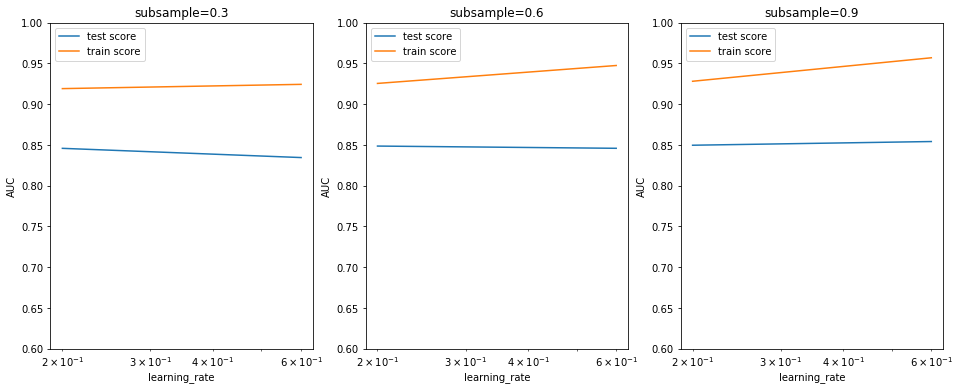

In [376]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [377]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

SyntaxError: invalid syntax (<ipython-input-377-c0bbf5868845>, line 3)

In [38]:
# predict
y_pred =model_cv.predict_proba(df_1[X_test.columns])
y_pred[:10]

NameError: name 'model_cv' is not defined

In [382]:
# roc_auc

auc = metrics.roc_auc_score(df_1.redemption_status, y_pred[:, 1])
auc

0.9283681357240232

In [ ]:
# feature importance
importance = dict(zip(X_train.columns, model.feature_importances_))
importance